# 6.2 Exploring relationships

# Contents
    1. Importing Libraries
    2. Importing Data
    3. Correlations
        3A. Correlation heatmap using pandas
        3B. Correlation heatmap using seaborn
        3C. Scatterplots
        3D. Pair plots
    4. Categorical plot question and answers
        4A. Did percent of cocao in the chocolate bars have an effect on rating?
        4B. Did number of ingredients affect the percent of cocao in the chocolate bars?
        4C. Did the number of ingredients have an effect on rating?
        4D. Which companies had the highest-ranking chocolate bars?
        4E. What is the cocoa percent of the highest rated companies?
        4F. Which countries had the highest-ranking chocolate bars?
        4G. Is there a pattern of cocoa percent used by country of the highest rated bars?
     5. Exploring 'Country of Bean Origin'.
        5A. Does the country of cocoa bean origin have an affect on rating?
        5B. From where do the beans come for the highest rated bars?
        5C. Looking into 'Specific Bean Origin or Bar Name'
        5D. Specific Origin of Bean from highest rated.
        5E. Specific Bean Origin and Cocoa Percent of the highest rated.
        5F. Specific Bean Origin and Number of Ingredients of the highest rated.
     6. Hypothesis
     7. Exporting data
        

# 1. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy


# 2. Importing Data

In [2]:
# creating path for import
path = r'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'


In [3]:
# check path
path

'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'

In [4]:
# importing 'df_flavors_clean.csv'
df_flavors_clean = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_flavors_clean.xlsx'))


In [5]:
# check import
df_flavors_clean.head()

,Unnamed: 0,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Number_of_Ingredients,Ingredients_abbr
0,0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,"molassses, intense, off, herb",3.25,3,"B,S,C"
1,1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,"oily, tangy, fruit, earthy",2.75,3,"B,S,C"
2,2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,"banana, menthol, medicinal",3.00,3,"B,S,C"
3,3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,"molasses, sweet, cocoa",3.25,3,"B,S,C"
4,4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,"sandy, spicy, earthy",3.50,3,NaN


In [6]:
# dropping 'Unnamed: 0'column
df_flavors_clean = df_flavors_clean.drop(columns = ['Unnamed: 0'])


In [7]:
df_flavors_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company (Manufacturer)            2657 non-null   object 
 1   Company Location                  2657 non-null   object 
 2   Review Date                       2657 non-null   int64  
 3   Country of Bean Origin            2657 non-null   object 
 4   Specific Bean Origin or Bar Name  2657 non-null   object 
 5   Cocoa Percent                     2657 non-null   float64
 6   Most Memorable Characteristics    2657 non-null   object 
 7   Rating                            2657 non-null   float64
 8   Number_of_Ingredients             2657 non-null   int64  
 9   Ingredients_abbr                  2570 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 207.7+ KB


# 3. Correlations

# 3A. Correlation Heatmap using pandas

In [8]:
# creating a correlation matrix using pandas
df_flavors_clean.corr()

/var/folders/sy/t8rtd3yx6xg83r29mvqjg7cm0000gp/T/ipykernel_93246/838395400.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_flavors_clean.corr()


,Review Date,Cocoa Percent,Rating,Number_of_Ingredients
Review Date,1.000000,0.006806,0.113353,-0.358076
Cocoa Percent,0.006806,1.000000,-0.141997,-0.156584
Rating,0.113353,-0.141997,1.000000,-0.097038
Number_of_Ingredients,-0.358076,-0.156584,-0.097038,1.000000


### Because pandas .corr( ) function only uses numeric colums for this execution, as I saw when I tried the following code: df_flavors_clean.corr(numeric_only=False), I have decided I need to discard some columns now to make this correlation matrix heatmap. I will use the non-numerical columns in the following categorical plot.

In [9]:
df_flavors_clean.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Most Memorable Characteristics', 'Rating',
       'Number_of_Ingredients', 'Ingredients_abbr'],
      dtype='object')

In [10]:
# Create a subset excluding non-numeric columns 'Company (Manufacturer)', 'Company Location',
#'Country of Bean Origin', 'Specific Bean Origin or Bar Name','Most Memorable Characteristics','Ingredients_abbr'

sub = df_flavors_clean[['Review Date', 'Cocoa Percent', 'Rating', 'Number_of_Ingredients']]

In [11]:
sub

,Review Date,Cocoa Percent,Rating,Number_of_Ingredients
0,2012,0.72,3.25,3
1,2012,0.72,2.75,3
2,2012,0.72,3.00,3
3,2012,0.72,3.25,3
4,2013,0.85,3.50,3
...,...,...,...,...
2652,2012,0.70,3.00,2
2653,2012,0.72,2.50,2
2654,2012,0.73,2.75,2
2655,2012,0.70,2.50,2


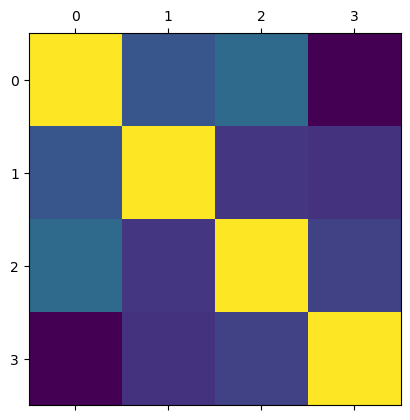

In [12]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

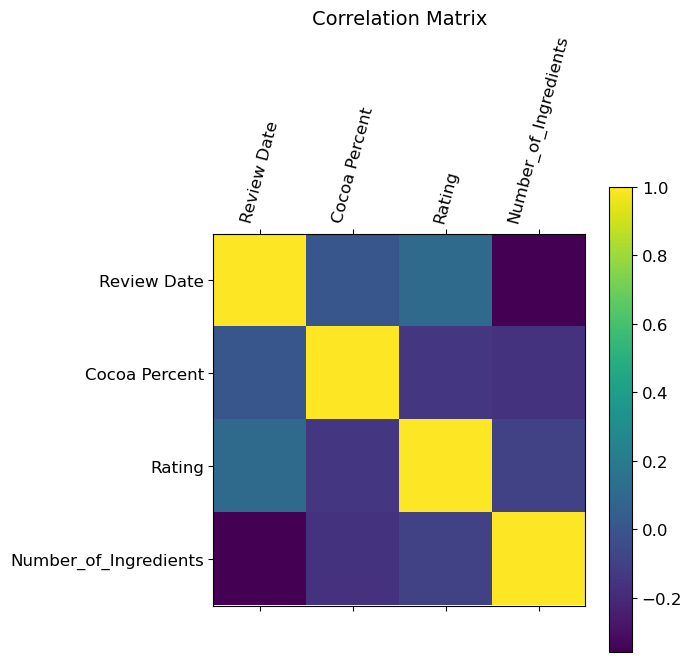

In [13]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=75) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr_matrix.png", bbox_inches='tight') # save

### Notes on matplotlib correlation heatmap:                                                                                                          Although the colors reflect relationships between these variables it is still somewhat difficult to determine these correlations due to most of the colors,to my eyes, being on the darker shade:  meaning most have negative to correlations. Except Rating to Review Date: this one appears slightly positive, meaning there is something about a particular year that produced specific ratings.

# 3B. Correlation heatmap using seaborn

[Text(0, 0.5, 'Review Date'),
 Text(0, 1.5, 'Cocoa Percent'),
 Text(0, 2.5, 'Rating'),
 Text(0, 3.5, 'Number_of_Ingredients')]

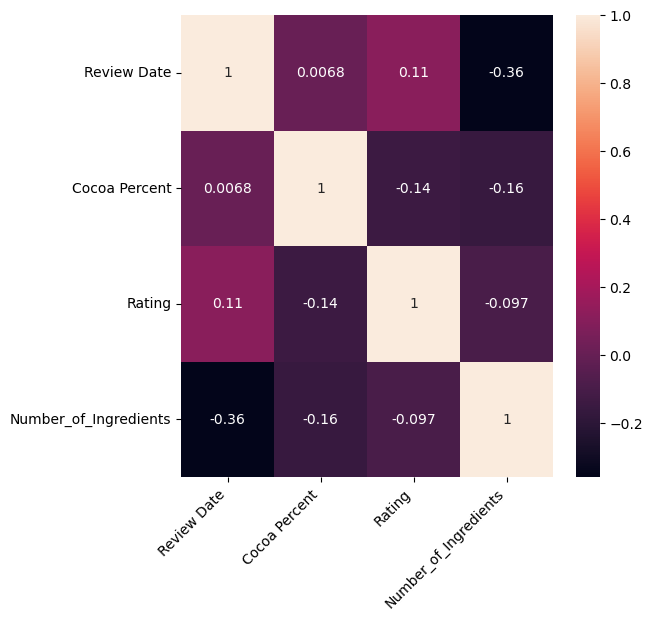

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Set the angles of the x-axis and y-axis labels
corr.set_xticklabels(corr.get_xticklabels(), rotation=45, horizontalalignment='right')
corr.set_yticklabels(corr.get_yticklabels(), rotation=0)  # 0 degree rotation for y-axis labels

### Notes on seaborn correlation heatmap:                                                                                                                   From this seaborn correlation heatmap one can see the specific relationships. We can see that half of the correlations are negative. Nothing terribly significant, though, with the exception of Review Date and Number_of_ Ingredients: the strongest, though negative, relationship. 

### Cocoa percent seems interesting: although the revie date has a neglible relationship with it, it is slightly positive- meaning a possible trend of cocoa use. Interesting, too, that rating and number of ingredients have a negative correlation although previous exploration showed there was not much of a correlation at all. But cocoa percent has a bigger affect on the rating than does the number of ingredients.

# 3C. Scatterplots

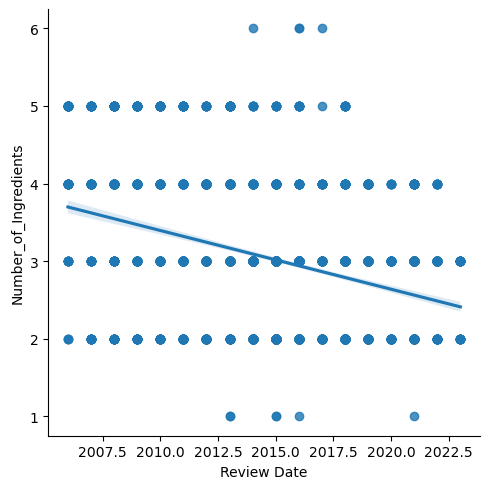

In [15]:
# Scatterplot for the "Number_of_Ingredients" and "Review Date" columns in seaborn

sns.lmplot(x = 'Review Date', y = 'Number_of_Ingredients', data = sub)

### There appears to be a trend, a negative correlation, that the more recent review dates are, the fewer number of ingredients have been used in the choicolate bars selected for this data set, but not by much. I believe the outlier in 2021, in the 1 ingredient row, is pulling the correlation line line down ans there are no 5 0r 6-ingredient bars since 2018, but the 2-3-4 ingredient bars are very similar.  

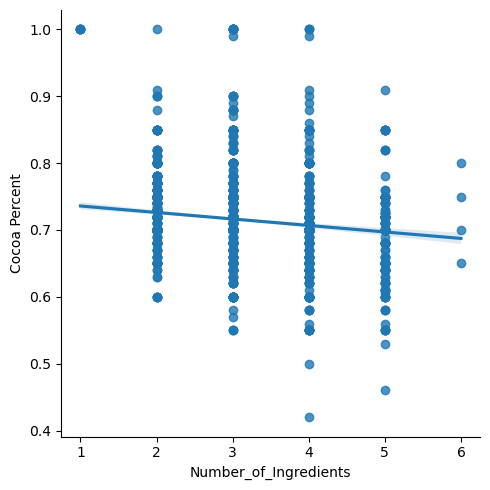

In [16]:
# Scatterplot for the "Number_of_Ingredients" and "Cocoa Percent" columns in seaborn

sns.lmplot(x = 'Number_of_Ingredients', y = 'Cocoa Percent', data = sub)

### Not a very substantial result but we can see that there is a negative correlation between cocoa percent and number of ingredients. The more ingredients used there is a trend of using a slightly smaller percent of cocoa in the bars. 

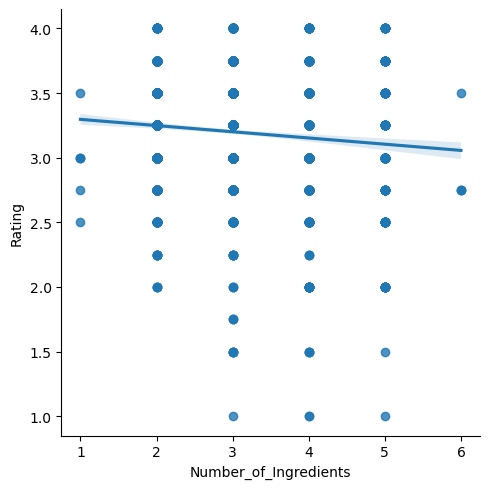

In [17]:
# Scatterplot for the "Number_of_Ingredients" and "Rating" columns in seaborn

sns.lmplot(x = 'Number_of_Ingredients', y = 'Rating', data = sub)

### It also appears that the chocolate-tasting experts prefer fewer ingredients.

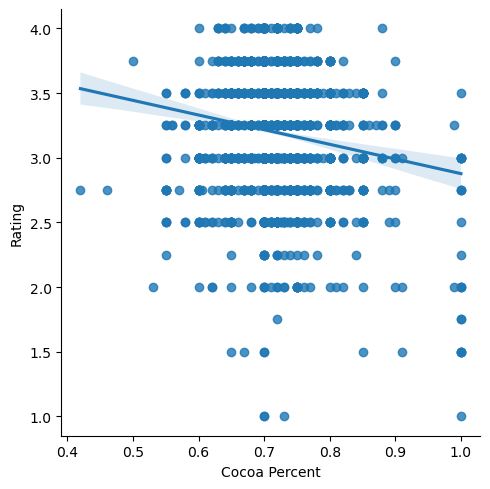

In [18]:
# Scatterplot for the "Cocoa Percent" and "Rating" columns in seaborn

sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = sub)

### The chocolate-tasting experts prefer a lower cocoa percent. This chart show us most of the ratings are between 2.5 and 3.5. However, outliers below a rating of 2 have higher cocoa percent. This could be pulling the correlation trend line down.

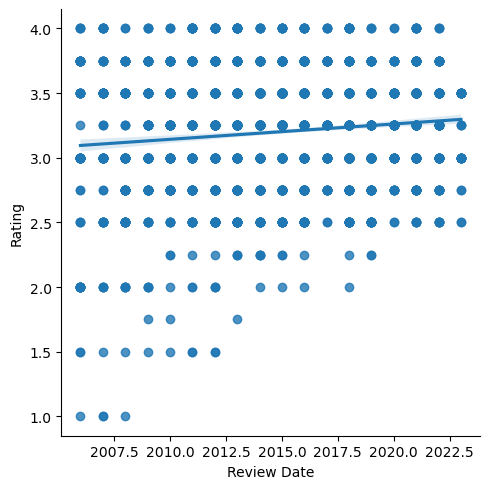

In [19]:
# Scatterplot for the "Review Date" and "Rating" columns in seaborn

sns.lmplot(x = 'Review Date', y = 'Rating', data = sub)

### This was more of a curiosity than anything else, but might be interesting. There have been slightly more higher-ratings in recents years of this set. A trend of the experts prefering recent chocolate manufactoring as opposed to chocolate made at the beginning of the set, 2007.  

# 3D. Pair plots

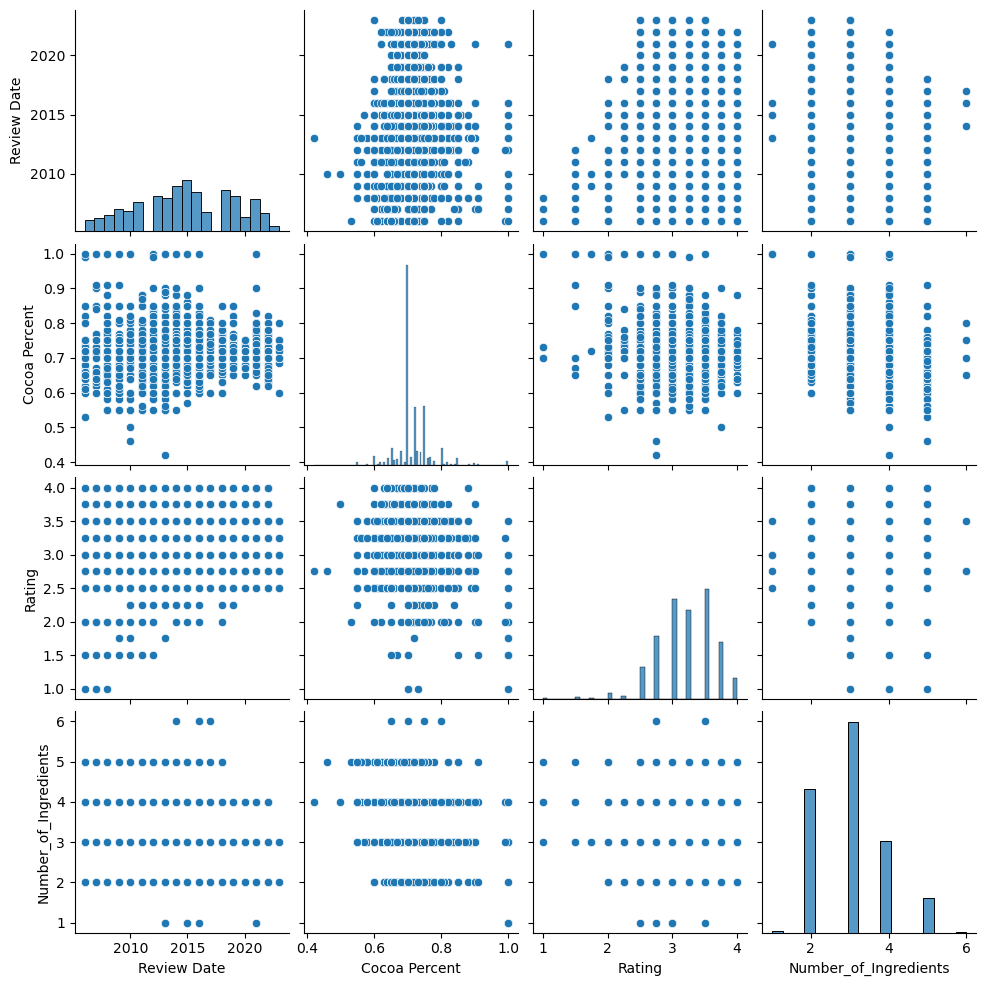

In [20]:
# Create a pair plot 

g = sns.pairplot(df_flavors_clean)

### Although rating seemed to be the focal point of this dataset it looks like cocoa percent is a driving factor in each of the other three variables: rating,review date and number of ingredients.   

# 4. Categorical plot question and answers

#         4A. Did percent of cocao in the chocolate bars have an effect on rating?

<Axes: xlabel='Cocoa Percent', ylabel='Count'>

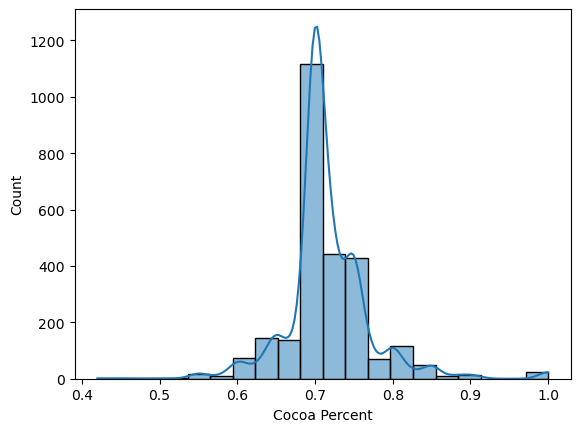

In [21]:
# histogram for 'Cocoa Percent'
sns.histplot(df_flavors_clean['Cocoa Percent'], bins = 20, kde = True)

In [22]:
# creating Cocoa Levels
df_flavors_clean.loc[df_flavors_clean['Cocoa Percent'] <0.6, 'Cocoa Level'] = 'Low percent'


In [23]:
df_flavors_clean.loc[(df_flavors_clean['Cocoa Percent'] >=0.6) & (df_flavors_clean['Cocoa Percent'] <0.75), 'Cocoa Level'] = 'Mid percent'


In [24]:
df_flavors_clean.loc[(df_flavors_clean['Cocoa Percent'] >=0.75) & (df_flavors_clean['Cocoa Percent'] <1), 'Cocoa Level'] = 'High percent'


In [25]:
df_flavors_clean.loc[df_flavors_clean['Cocoa Percent'] ==1, 'Cocoa Level'] = 'Completely Cocoa'

In [26]:
# check 'Cocoa level'
df_flavors_clean['Cocoa Level'].value_counts(dropna = False)

Mid percent         1985
High percent         620
Low percent           31
Completely Cocoa      21
Name: Cocoa Level, dtype: int64

In [27]:
df_flavors_clean.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Most Memorable Characteristics', 'Rating',
       'Number_of_Ingredients', 'Ingredients_abbr', 'Cocoa Level'],
      dtype='object')

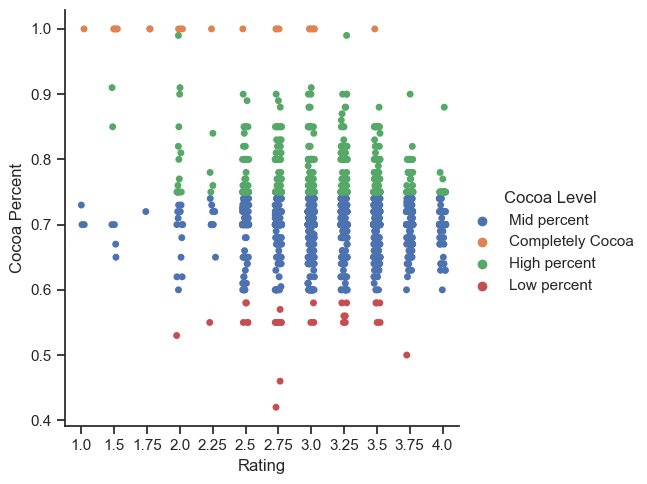

In [28]:
# Create a categorical plot in seaborn using the Cocoa Level' categories created above

sns.set(style="ticks")
g = sns.catplot(x='Rating', y='Cocoa Percent', hue='Cocoa Level', data=df_flavors_clean)

### Question: Did percent of cocao in the chocolate bars have an effect on rating? 
### Answer: Mid and High percent of cocoa appear to achieve the most ratings, between 2.5-3.5 but the highest rating (4) are from bars with Mid percent cocoa.

# 4B. Did number of ingredients affect the percent of cocao in the chocolate bars?

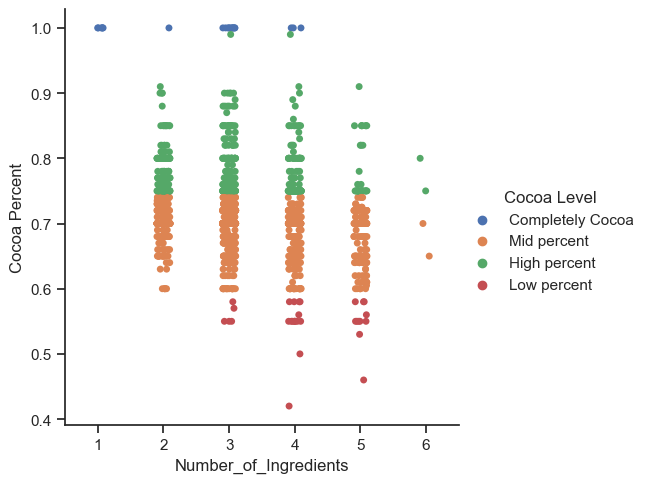

In [29]:
# Create a categorical plot in seaborn using the Cocoa Level' categories created above

sns.set(style="ticks")
g = sns.catplot(x='Number_of_Ingredients', y='Cocoa Percent', hue='Cocoa Level', data=df_flavors_clean)

### Question: Did number of ingredients affect the percent of cocao in the chocolate bars?                              
### Answer: It appears that the number of ingredients had an affect on the cocao percent. As the number of ingredients increased the percent of cocoa went down, mostly from the 'High Percent' category.

# 4C. Did the number of ingredients have an effect on rating?

<Axes: xlabel='Number_of_Ingredients', ylabel='Count'>

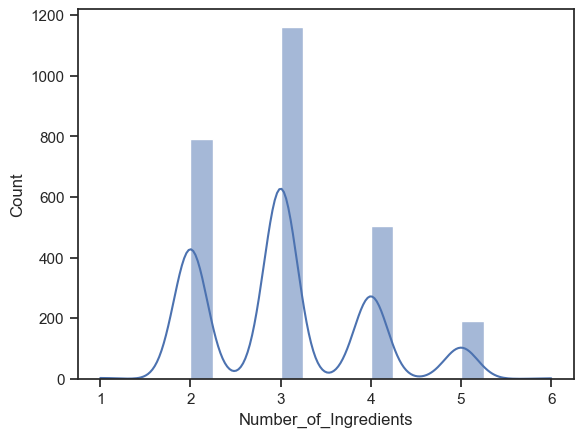

In [30]:
# histogram for 'Number_of_Ingredients'
sns.histplot(df_flavors_clean['Number_of_Ingredients'], bins = 20, kde = True)

In [31]:
# creating Ingredient Levels
# The same results would be achieved without the "Ingredient Level" creation, but I felt the 
# colors in the following would be helpful for easier reading.
df_flavors_clean.loc[df_flavors_clean['Number_of_Ingredients'] ==1, 'Ingredient Level'] = '1'
df_flavors_clean.loc[df_flavors_clean['Number_of_Ingredients'] ==2, 'Ingredient Level'] = '2'
df_flavors_clean.loc[df_flavors_clean['Number_of_Ingredients'] ==3, 'Ingredient Level'] = '3'
df_flavors_clean.loc[df_flavors_clean['Number_of_Ingredients'] ==4, 'Ingredient Level'] = '4'
df_flavors_clean.loc[df_flavors_clean['Number_of_Ingredients'] ==5, 'Ingredient Level'] = '5'
df_flavors_clean.loc[df_flavors_clean['Number_of_Ingredients'] ==6, 'Ingredient Level'] = '6'

In [32]:
# check 'Ingredient Levels'
df_flavors_clean['Ingredient Level'].value_counts(dropna = False)

3    1161
2     791
4     504
5     191
1       6
6       4
Name: Ingredient Level, dtype: int64

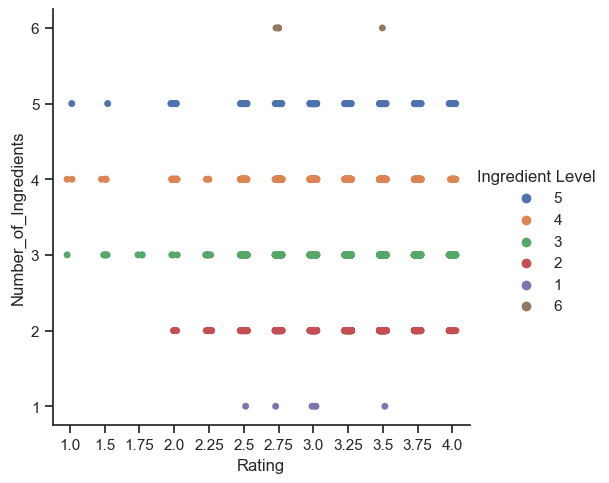

In [33]:
# Create a categorical plot in seaborn using the 'Ingredient Level' categories created above

sns.set(style="ticks")
g = sns.catplot(x='Rating', y='Number_of_Ingredients', hue='Ingredient Level', data=df_flavors_clean)

### Question: Did the number of ingredients have an effect on rating?                                                                   
### Answer: It does not appear that the number of ingredients affected the rating very much although there are not very many bars with just 1 or 6 ingredients. These did not receive the highest rating but neither did they receive the lowest.   

# 4D. Which companies had the highest-ranking chocolate bars? 

<Axes: xlabel='Rating', ylabel='Count'>

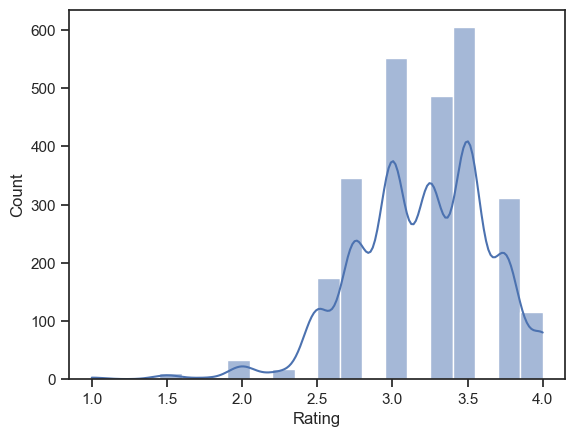

In [34]:
# histogram for 'Rating'
sns.histplot(df_flavors_clean['Rating'], bins = 20, kde = True)

In [35]:
# creating Rating Levels
df_flavors_clean.loc[df_flavors_clean['Rating'] ==4, 'Rating Level'] = 'Highest'
df_flavors_clean.loc[(df_flavors_clean['Rating'] >=2.5) & (df_flavors_clean['Rating'] <4), 'Rating Level'] = 'Mid-level'
df_flavors_clean.loc[df_flavors_clean['Rating'] <2.5, 'Rating Level'] = 'Lowest'
 

In [36]:
# check 'Rating Level'
df_flavors_clean['Rating Level'].value_counts(dropna = False)

Mid-level    2475
Highest       115
Lowest         67
Name: Rating Level, dtype: int64

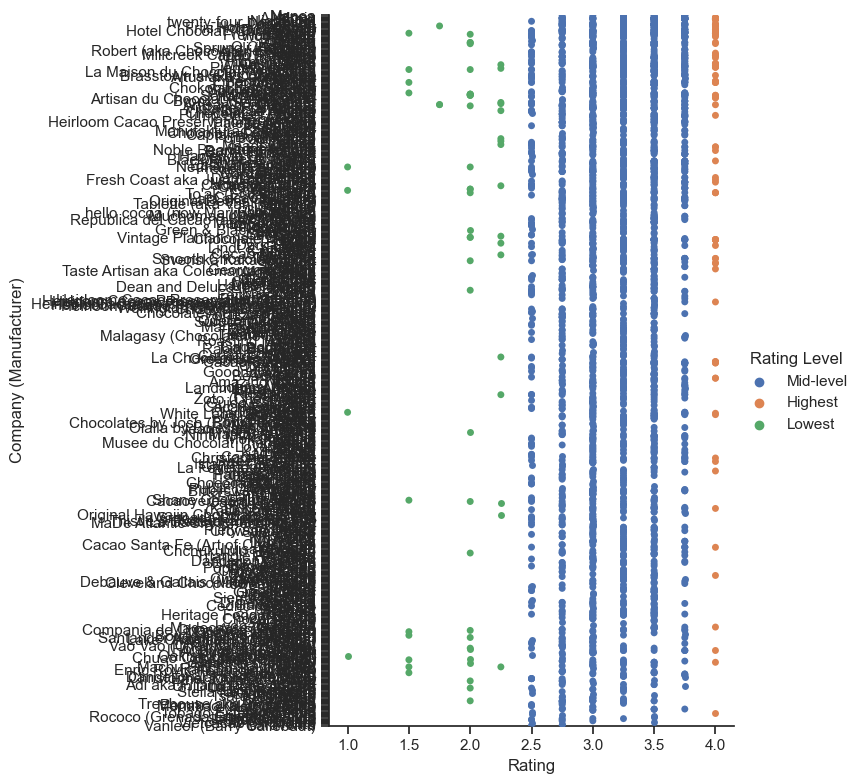

In [37]:
# Create a categorical plot in seaborn using the 'Rating Level' categories created above

sns.set(style="ticks")
g = sns.catplot(x='Rating', y='Company (Manufacturer)', hue='Rating Level', data=df_flavors_clean, height=8, aspect=1)

### Well- this is a mess, even with making the charl taller. This chart is not the best way to answer the question of which companies had the highest ratings.                                                                                                                                                           However, what we can see from this is that most companies ratings fall into the 'Mid-level' rating.

# 4E. What is the cocoa percent of the highest rated companies?

In [38]:
# finding companiest with the highest ratings (4)
df_flavors_clean.loc[df_flavors_clean['Rating'] == 4].head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Number_of_Ingredients,Ingredients_abbr,Cocoa Level,Ingredient Level,Rating Level
12,A. Morin,France,2013,Venezuela,Chuao,0.70,"oily, nut, caramel, raspberry",4.0,4,"B,S,C,L",Mid percent,4,Highest
15,A. Morin,France,2013,Peru,Chanchamayo Province,0.63,"sweet, cocoa, tangerine",4.0,3,"B,S,C",Mid percent,3,Highest
25,Hotel Chocolat,U.K.,2013,St. Lucia,"Marcial, single Cote, 2012",0.70,cardamon,4.0,2,"B,S",Mid percent,2,Highest
30,Patric,U.S.A.,2013,Peru,"Piura, Choc. Garage Exclusive",0.67,"creamy, cocoa, grapes",4.0,3,"B,S,C",Mid percent,3,Highest
75,Soma,Canada,2013,Blend,"Crazy 88, Guat., D.R., Peru, Mad., PNG",0.88,"pronounced berry,mild smoke",4.0,3,"B,S,C",High percent,3,Highest


In [39]:
highest_rating_companies= df_flavors_clean.loc[df_flavors_clean['Rating'] == 4]

In [40]:
highest_rating_companies.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Number_of_Ingredients,Ingredients_abbr,Cocoa Level,Ingredient Level,Rating Level
12,A. Morin,France,2013,Venezuela,Chuao,0.70,"oily, nut, caramel, raspberry",4.0,4,"B,S,C,L",Mid percent,4,Highest
15,A. Morin,France,2013,Peru,Chanchamayo Province,0.63,"sweet, cocoa, tangerine",4.0,3,"B,S,C",Mid percent,3,Highest
25,Hotel Chocolat,U.K.,2013,St. Lucia,"Marcial, single Cote, 2012",0.70,cardamon,4.0,2,"B,S",Mid percent,2,Highest
30,Patric,U.S.A.,2013,Peru,"Piura, Choc. Garage Exclusive",0.67,"creamy, cocoa, grapes",4.0,3,"B,S,C",Mid percent,3,Highest
75,Soma,Canada,2013,Blend,"Crazy 88, Guat., D.R., Peru, Mad., PNG",0.88,"pronounced berry,mild smoke",4.0,3,"B,S,C",High percent,3,Highest


In [41]:
highest_rating_companies['Company (Manufacturer)'].unique().tolist()

['A. Morin',
 'Hotel Chocolat',
 'Patric\xa0',
 'Soma',
 'Rogue',
 'Pierre Marcolini',
 'Domori',
 'Benoit Nihant',
 'Fresco',
 'Matale',
 'Valrhona',
 'Bar Au Chocolat',
 'Bonnat',
 "Brasstown aka It's Chocolate",
 'Fresh Coast aka Just Good Choc.',
 'Pacari',
 'Ocelot',
 'Arete',
 'Pralus',
 'Smooth Chocolator, The',
 'Durci',
 'Georgia Ramon',
 "Duffy's",
 'Castronovo',
 'Heirloom Cacao Preservation (Zokoko)',
 'Fruition',
 "Willie's Cacao",
 'Patric',
 'Letterpress',
 'Dick Taylor',
 'Potomac',
 'Brasstown',
 'Friis Holm',
 'Christopher Elbow',
 'Taste Artisan',
 'Qantu',
 'Chokola',
 'Dandelion',
 'Cacaosuyo',
 'Kah Kow - USA',
 'White Label aka Mutari',
 'Madecasse (Cinagra)',
 'Scharffen Berger',
 'Cacao Sampaka',
 'Amano',
 'Felchlin',
 'AMMA',
 'Beschle (Felchlin)',
 'Artisan du Chocolat',
 'Idilio (Felchlin)',
 'Woodblock',
 'L.A. Burdick (Felchlin)',
 'Ritual',
 'Tobago Estate (Pralus)',
 'Danta']

In [42]:
# exploring 'Highest Level' companies

highest_rating_companies['Company (Manufacturer)'].value_counts(dropna = False)

Soma                                    15
Bonnat                                   8
Arete                                    6
Fresco                                   5
Domori                                   4
Valrhona                                 4
A. Morin                                 4
Idilio (Felchlin)                        4
Cacao Sampaka                            3
Pierre Marcolini                         3
Dick Taylor                              3
Castronovo                               3
Pacari                                   3
Smooth Chocolator, The                   2
Amano                                    2
Friis Holm                               2
Durci                                    2
Scharffen Berger                         2
Patric                                   2
Matale                                   2
Benoit Nihant                            2
Pralus                                   1
Ocelot                                   1
Kah Kow - U

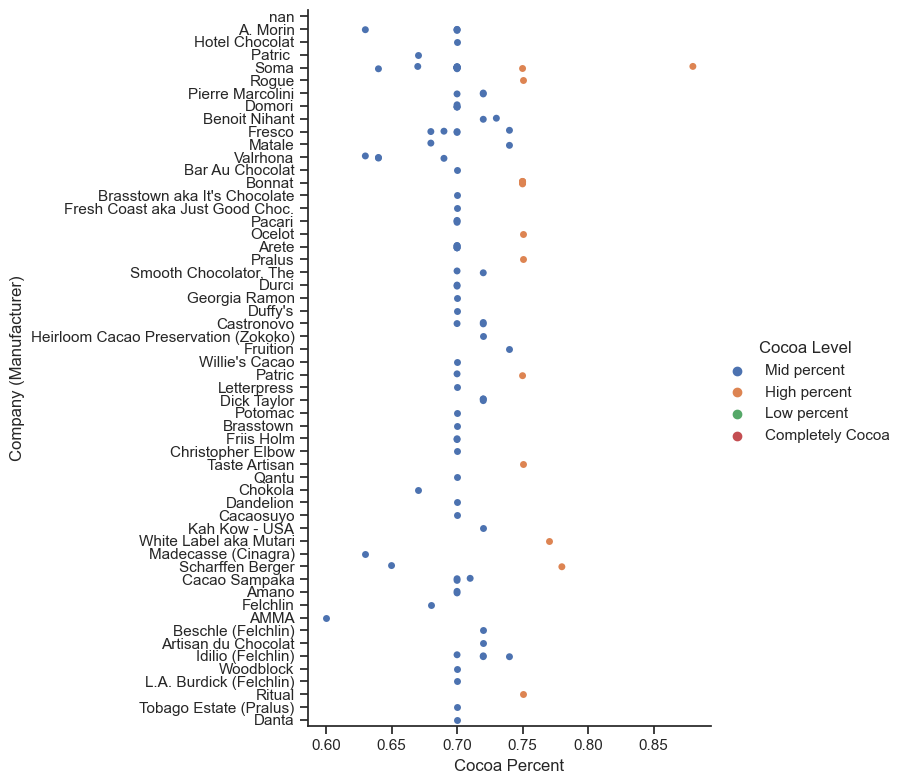

In [43]:
# Create a categorical plot in seaborn using the 'Cocao Level' for highest rated companies categories created above

sns.set(style="ticks")
g = sns.catplot(x='Cocoa Percent', y=highest_rating_companies['Company (Manufacturer)'], hue='Cocoa Level', data=df_flavors_clean, height=8, aspect=1)


### What we see here is that the companies with the highest rating mostly had mid-level cocoa percent chocolate bars.   Interestingly, the company Soma has the highest cocoa percent outlier, and is also rated highest rating 15 times- more than any other company.

# 4F. Which countries had the highest-rated chocolate bars?

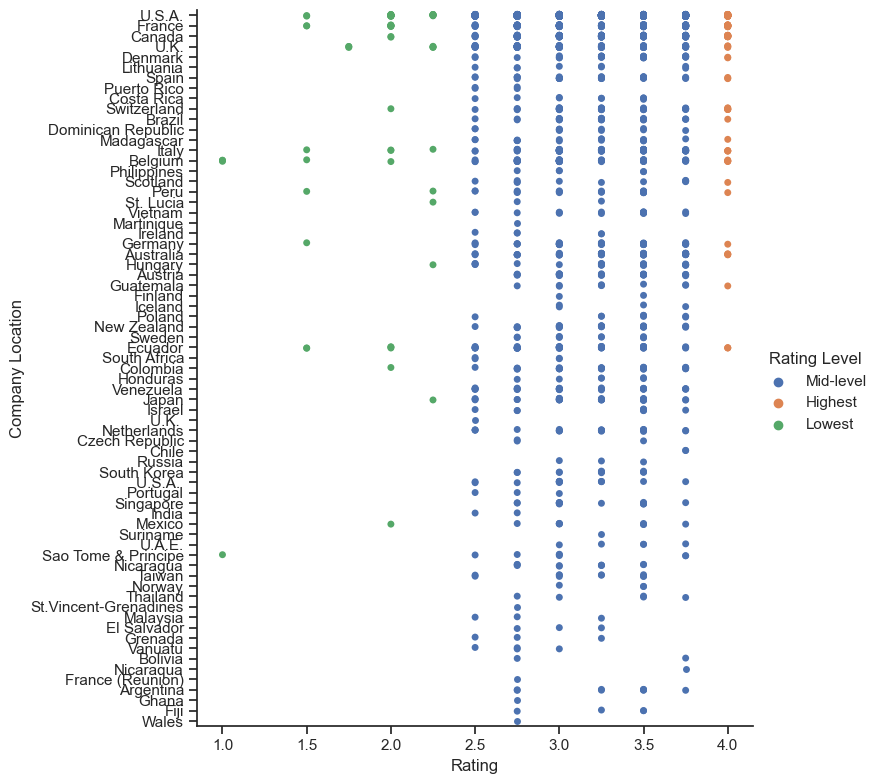

In [44]:
# Create a categorical plot in seaborn using the 'Rating Level' categories created above

sns.set(style="ticks")
g = sns.catplot(x='Rating', y='Company Location', hue='Rating Level', data=df_flavors_clean, height=8, aspect=1)

### This chart may not be the best way to find which countries had the highest rated chocolate bars, but we can see that most ratings are in the mid-level rank.

# 4G. Is there a pattern of cocoa percent used by country of the highest rated bars?



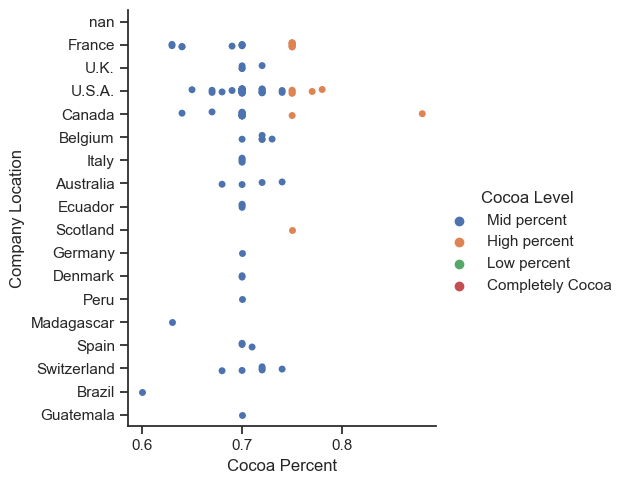

In [45]:
# Create a categorical plot in seaborn using the 'Cocao Level' for highest rated by countries categories created above

sns.set(style="ticks")
g = sns.catplot(x='Cocoa Percent', y=highest_rating_companies['Company Location'], hue='Cocoa Level', data=df_flavors_clean)


# 5. Exploring 'Country of Bean Origin'.

In [46]:
# exploring ingredients
df_flavors_clean['Country of Bean Origin'].value_counts(dropna = False)

Venezuela             260
Peru                  256
Dominican Republic    239
Ecuador               224
Madagascar            189
                     ... 
Gabon                   1
Sulawesi                1
Suriname                1
Martinique              1
Principe                1
Name: Country of Bean Origin, Length: 64, dtype: int64

In [47]:
df_flavors_clean['Country of Bean Origin'].unique()

array(['Liberia', 'U.S.A.', 'Peru', 'Panama', 'Madagascar', 'Brazil',
       'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea', 'Venezuela',
       'Dominican Republic', 'Belize', 'Bolivia', 'St. Lucia',
       'Indonesia', 'Nicaragua', 'Trinidad', 'Vietnam', 'Gabon', 'Blend',
       'Congo', 'Puerto Rico', 'Costa Rica', 'Haiti', 'Jamaica', 'Mexico',
       'Ghana', 'Philippines', 'Cuba', 'Tobago', 'Martinique', 'Grenada',
       'Vanuatu', 'Guatemala', 'Honduras', 'Fiji', 'Uganda', 'Sao Tome',
       'Tanzania', 'El Salvador', 'Ivory Coast', 'Sri Lanka', 'Australia',
       'Cameroon', 'Togo', 'Malaysia', 'Solomon Islands', 'Samoa',
       'India', 'Suriname', 'Nigeria', 'Sulawesi', 'Taiwan',
       'Sierra Leone', 'Sumatra', 'Thailand', 'DR Congo',
       'St.Vincent-Grenadines', 'Sao Tome & Principe', 'China', 'Bali',
       'France', 'Principe'], dtype=object)

# 5A. Does the country of cocoa bean origin have an affect on rating?

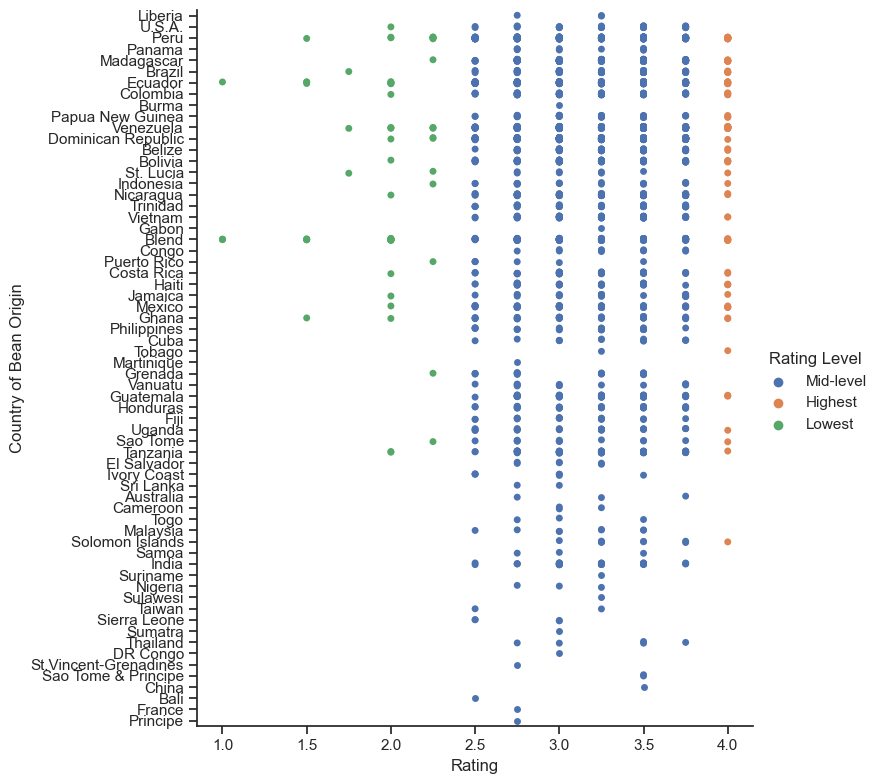

In [48]:
# Create a categorical plot in seaborn using the 'Country of Bean Origin' for highest rated by countries categories created above

sns.set(style="ticks")
g = sns.catplot(x='Rating', y='Country of Bean Origin', hue='Rating Level', data=df_flavors_clean, height=8, aspect=1)


### It doesn't seem to matter where the beans come from, most beans used are in the mid-level rating. 

# 5B. From where do the beans come for the highest rated bars?

In [49]:
# Origin of Bean from highest rated. 
highest_rating_companies['Country of Bean Origin'].unique().tolist()


['Venezuela',
 'Peru',
 'St. Lucia',
 'Blend',
 'Bolivia',
 'Ecuador',
 'Madagascar',
 'Papua New Guinea',
 'Jamaica',
 'Brazil',
 'Nicaragua',
 'Sao Tome',
 'Ghana',
 'Guatemala',
 'Belize',
 'Costa Rica',
 'Vietnam',
 'Colombia',
 'Solomon Islands',
 'Haiti',
 'Tanzania',
 'Mexico',
 'Dominican Republic',
 'Uganda',
 'Indonesia',
 'Tobago']

In [50]:
# Where do beans come from of the highest rated?

highest_rating_companies['Country of Bean Origin'].value_counts(dropna = False)

Venezuela             20
Peru                  19
Madagascar            11
Ecuador                9
Blend                  7
Mexico                 5
Bolivia                5
Brazil                 5
Colombia               5
Papua New Guinea       4
Haiti                  3
Guatemala              3
Ghana                  2
Belize                 2
Costa Rica             2
Vietnam                2
Nicaragua              2
Sao Tome               1
Solomon Islands        1
Jamaica                1
Tanzania               1
St. Lucia              1
Dominican Republic     1
Uganda                 1
Indonesia              1
Tobago                 1
Name: Country of Bean Origin, dtype: int64


### Of the highest rated chocolate bars, most of the beans come from 3 countries: Venezuela, Peru and Madagascar.

# 5C. Looking into 'Specific Bean Origin or Bar Name'

In [51]:
df_flavors_clean.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Number_of_Ingredients,Ingredients_abbr,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,"molassses, intense, off, herb",3.25,3,"B,S,C",Mid percent,3,Mid-level
1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",Mid percent,3,Mid-level
2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,"banana, menthol, medicinal",3.00,3,"B,S,C",Mid percent,3,Mid-level
3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,"molasses, sweet, cocoa",3.25,3,"B,S,C",Mid percent,3,Mid-level
4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,"sandy, spicy, earthy",3.50,3,NaN,High percent,3,Mid-level


In [52]:
df_flavors_clean['Specific Bean Origin or Bar Name'].unique().tolist()
                                                    

['Liberia, batch 174',
 "Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",
 'Piura, batch 173',
 "O'ahu Island, Winward,Maunawili district, b. 151",
 'Criollo Blend',
 'Panama',
 'Madagascar, Criollo',
 'Brazil',
 'Equateur',
 'Colombie',
 'Birmanie',
 'Papua New Guinea',
 'Chuao',
 'Piura',
 'Chanchamayo Province',
 'Rizek Cacao, batch DR 12',
 'Peru',
 'Ecuador',
 'Dominican Republic, batch 85',
 'Toledo District, w/ nibs',
 'Palos Blancos, batch 97',
 'Cumboto, farmer Jose Lugo, batch 1',
 'Patanemo, batch 3',
 'Conacado, #223, MR, SC, batch 13-051',
 'Marcial, single Cote, 2012',
 'Toledo District',
 'Java',
 'Barba, Xoco',
 'Medagla, Xoco',
 'Piura, Choc. Garage Exclusive',
 'Ecuador, Choc. Garage Exclusive',
 'Trinidad',
 'Mekong Delta & Dong Nai',
 'Akessons Estate, Sambirano, 2013',
 'Maragnam',
 'Palo Blanco, Chulucanas',
 'Camino Verde P., Balao, Guayas, batch 1',
 'Gran Couva, batch 1',
 'Gabon',
 'La Red',
 'Trinidad & Tobago',
 'Congo, Grand Cru',
 'Puerto Rico',
 'Costa R

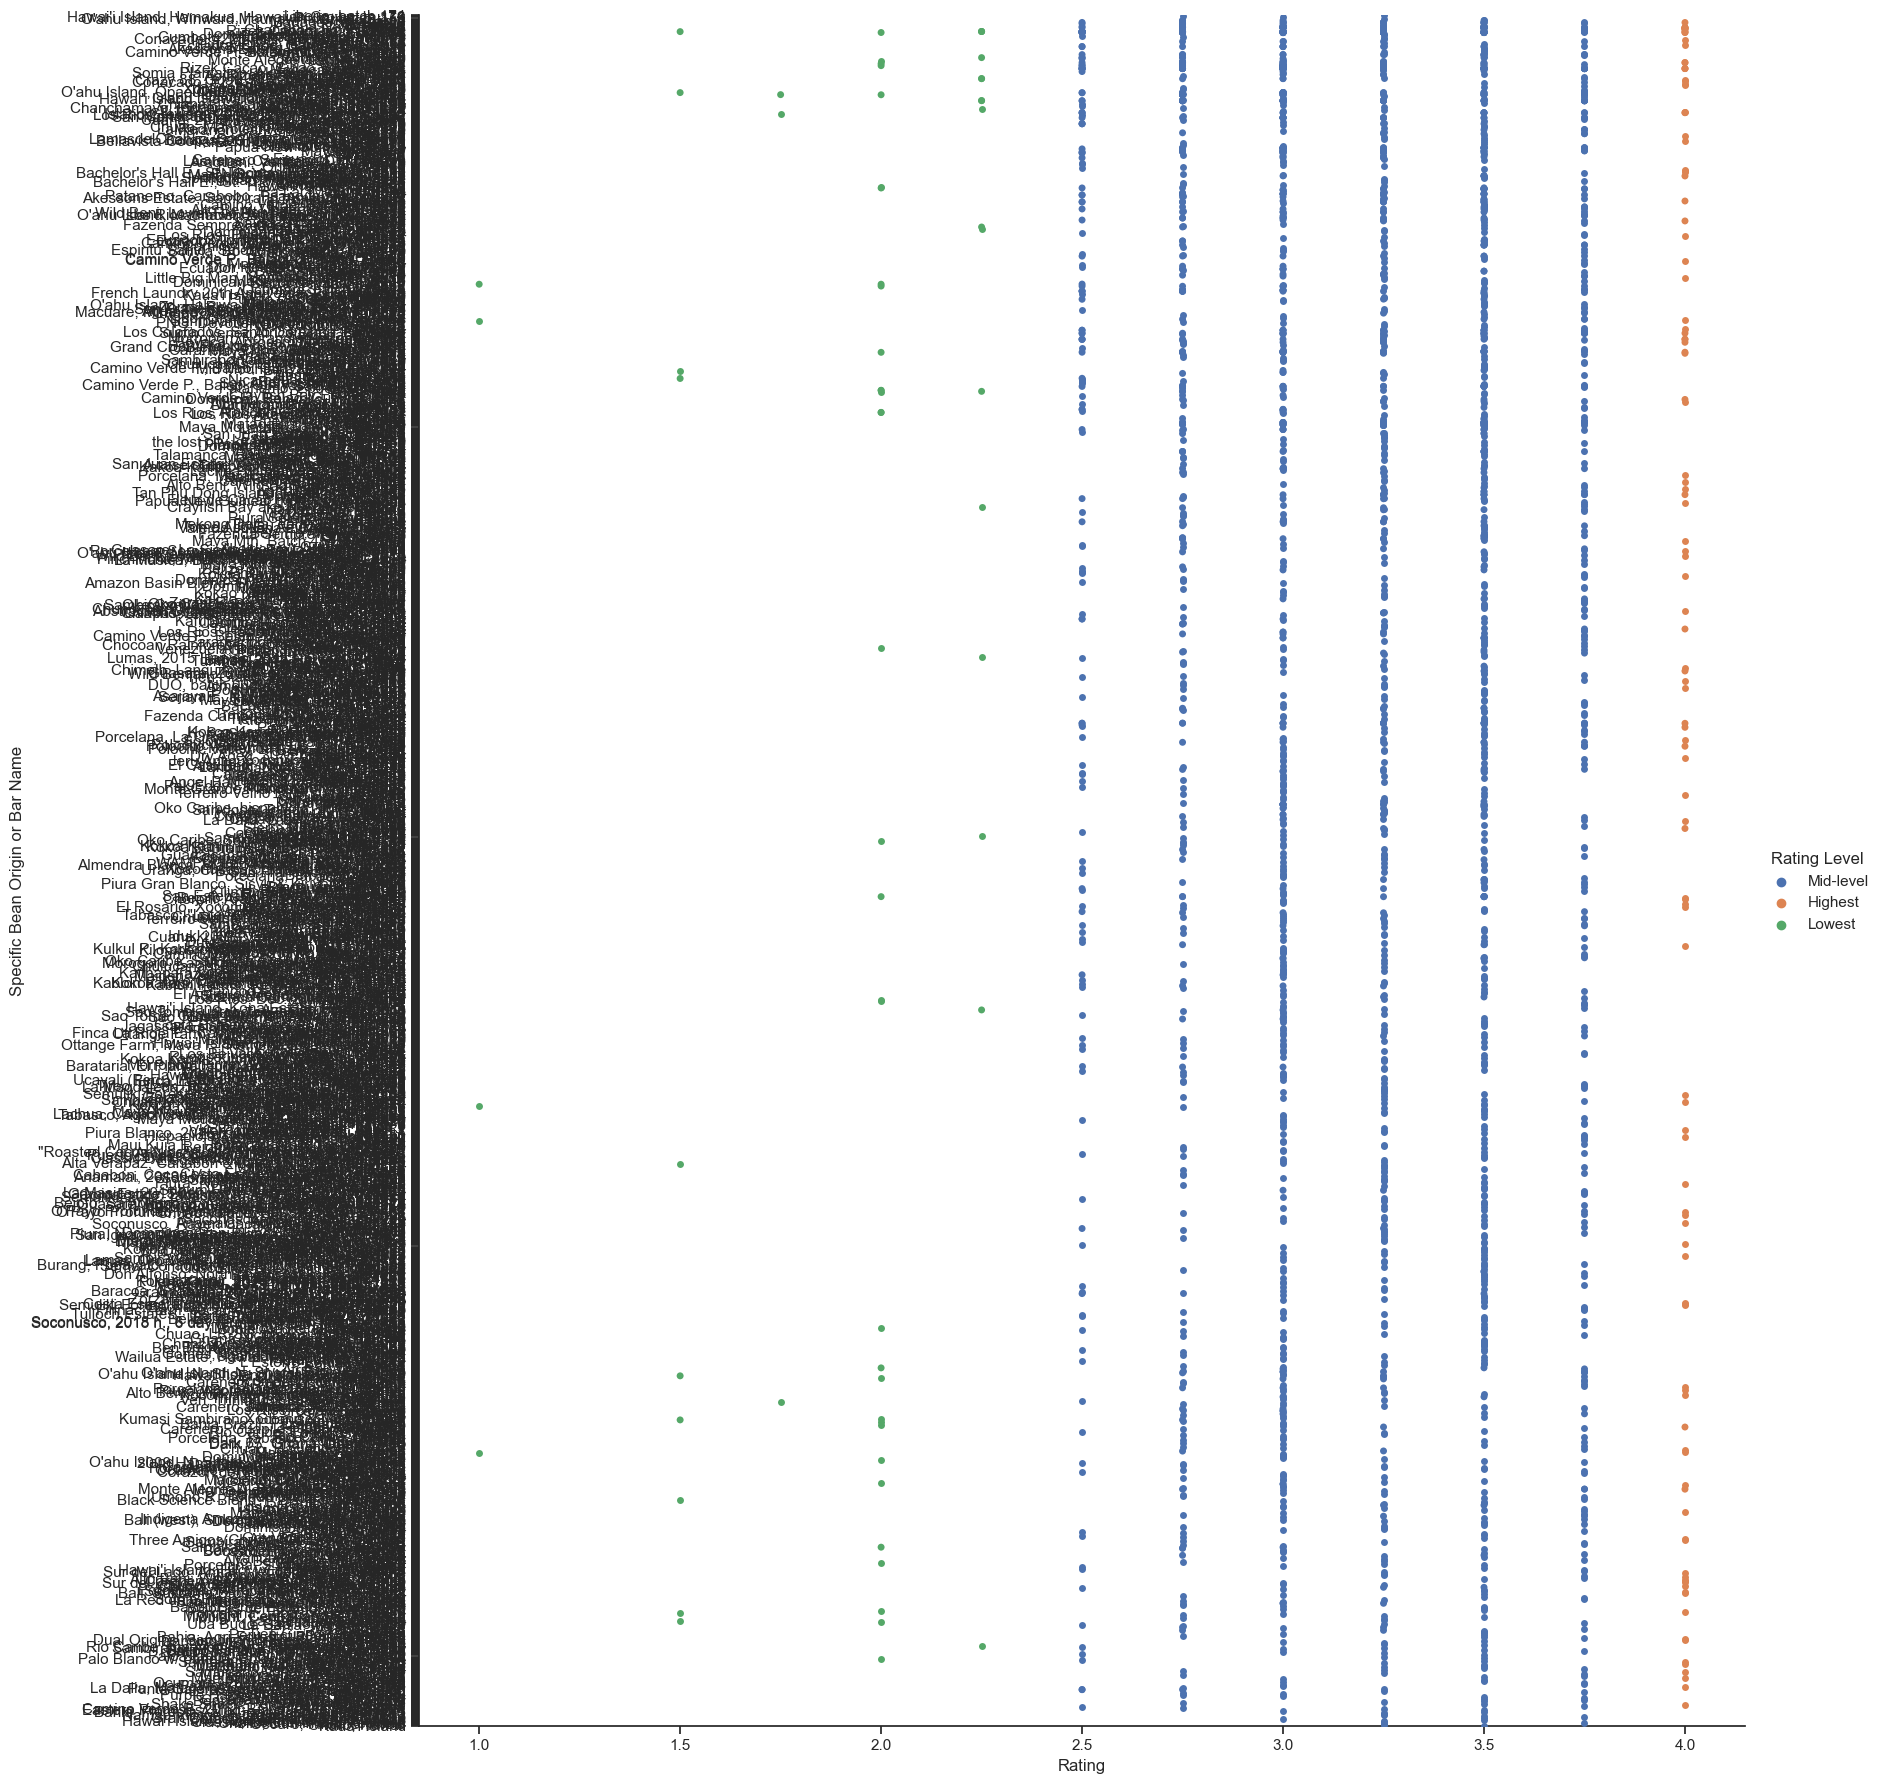

In [53]:
# Specific Bean Origin and Rating
sns.set(style="ticks")
g = sns.catplot(x='Rating', y='Specific Bean Origin or Bar Name', hue='Rating Level', data=df_flavors_clean, height=18, aspect=1)


### There are too many specific origins for this chart to be helpful, but, once again, most ratings are mid-level.      More analysis below...

## 5D. Specific Origin of Bean from highest rated.

In [54]:
 
highest_rating_companies['Specific Bean Origin or Bar Name'].unique().tolist()

['Chuao',
 'Chanchamayo Province',
 'Marcial, single Cote, 2012',
 'Piura, Choc. Garage Exclusive',
 'Crazy 88, Guat., D.R., Peru, Mad., PNG',
 'Maracaibo, El Vigia',
 'Silvestre, Batch 7, 2013',
 'Equator, Peru, Dom. Rep',
 'Cabosse, Venezuela, Java',
 'Porcelana',
 'Rio Peripa H.',
 'Bellavista Coop, #225, LR, MC, CG Exclusive',
 'Somia, 2013',
 'Kulili P., 2013',
 "Bachelor's Hall E., St. Thomas Parish, batch bh1",
 'Manjari',
 'Maranon Canyon',
 'Pablino',
 'Kaori',
 'Peru',
 'Sambirano, Ambanja, Madagascar',
 'Tangara',
 'Piura, Illanka, Quemazon',
 'Piura',
 'Chuno',
 'Claudio Corallo w/ nibs',
 'Camino Verde',
 'Corona Arriba',
 'ABOCFA Coop',
 'Rio Dulce, Xoco',
 'Maya Mtn, Batch 454, Heirloom',
 'Porcelana, Sorotaima,Machiques,batch pcl001',
 'Wild Beni, Lower Rio Beni, Tranquilidad, 2015',
 'Coto Brus, Heirloom, Batch 1',
 'Tien Giang, Black S., batch VIT60420.0',
 'Sierra Nevada, Tutu Iku',
 'Los Llanos',
 'Coto Brus, Terciopelo',
 'Ecuador',
 'Ocumare 67, Puertofino',
 'Pha

In [55]:
highest_rating_companies['Specific Bean Origin or Bar Name'].value_counts(dropna = False)

Chuao                                            3
Piura                                            3
Madagascar                                       3
Haiti                                            2
Tumaco                                           2
                                                ..
Wild Beni, Lower Rio Beni, Tranquilidad, 2015    1
Porcelana, Sorotaima,Machiques,batch pcl001      1
Maya Mtn, Batch 454, Heirloom                    1
Rio Dulce, Xoco                                  1
Las Acacias E.                                   1
Name: Specific Bean Origin or Bar Name, Length: 105, dtype: int64

### It does not appear any specific bean origin plays a significant part in chocolate bar making from these companies. Nor does it appear that any specific bean claims significance in rating.

# 5E. Specific Bean Origin and Cocoa Percent of the highest rated.

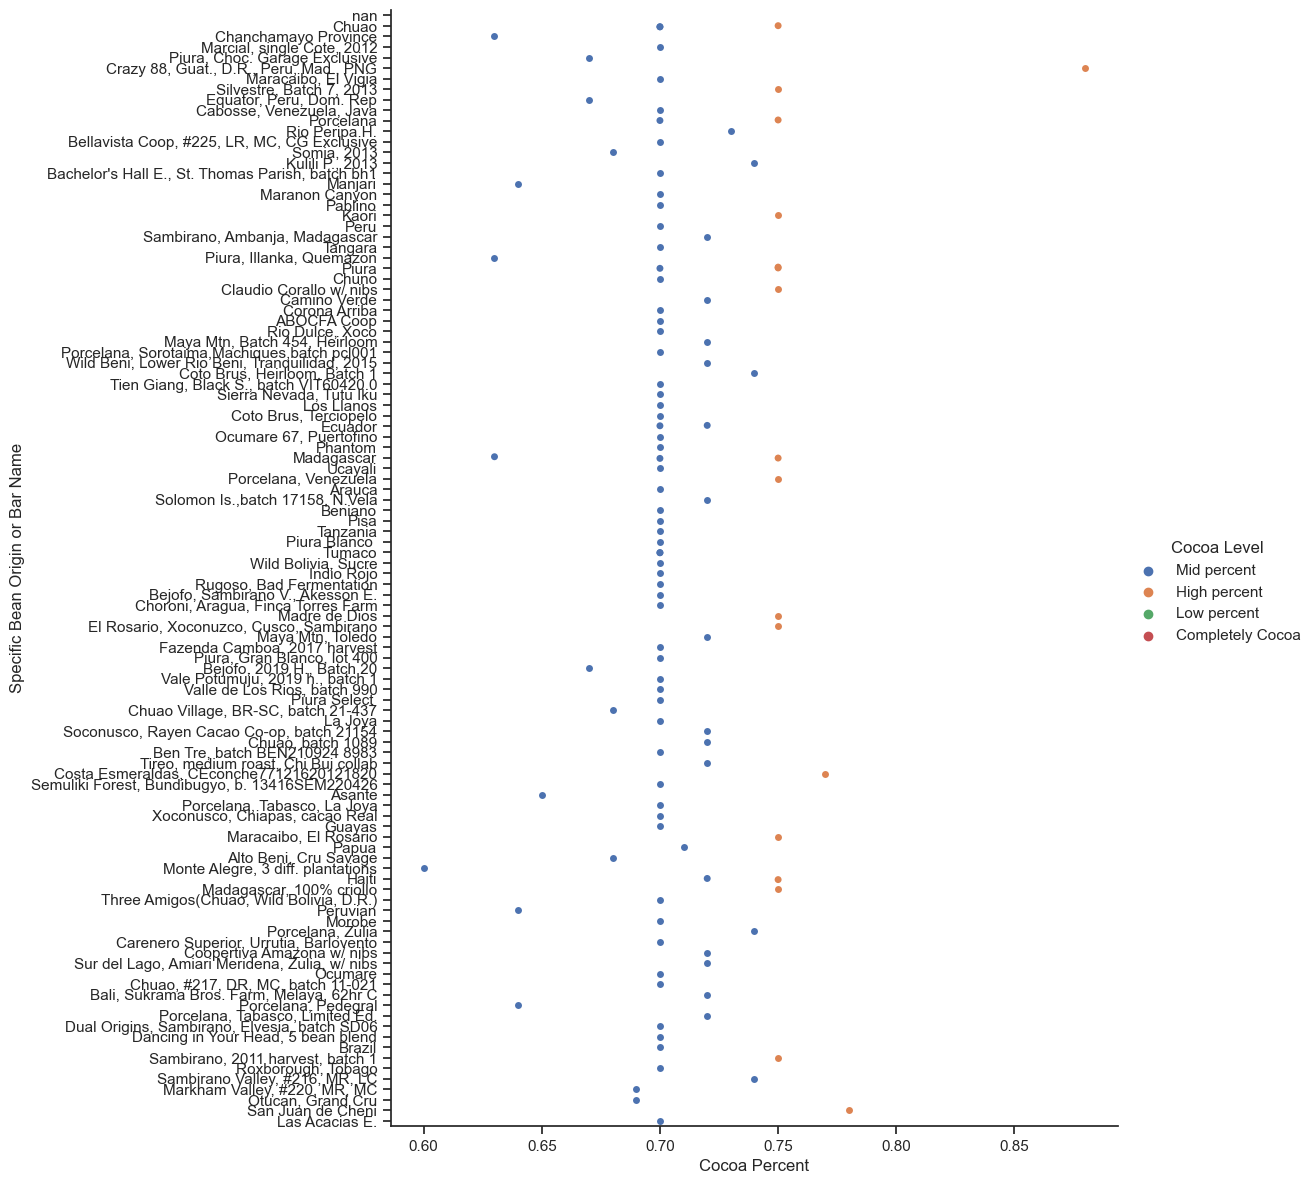

In [56]:
# Create a categorical plot in seaborn using the 'Cocao Level' for highest rated by bean origins. 
g = sns.catplot(x='Cocoa Percent', y=highest_rating_companies['Specific Bean Origin or Bar Name'], hue='Cocoa Level', data=df_flavors_clean, height=12, aspect=1)


### Again there are many, many bean origins- so much so that it does not appear the specific origin of bean plays a significant role in chocolate bar making. Here, as before, most beans used fall into mid-level cocoa percent.

#  5F. Specific Bean Origin and Number of Ingredients of the highest rated.

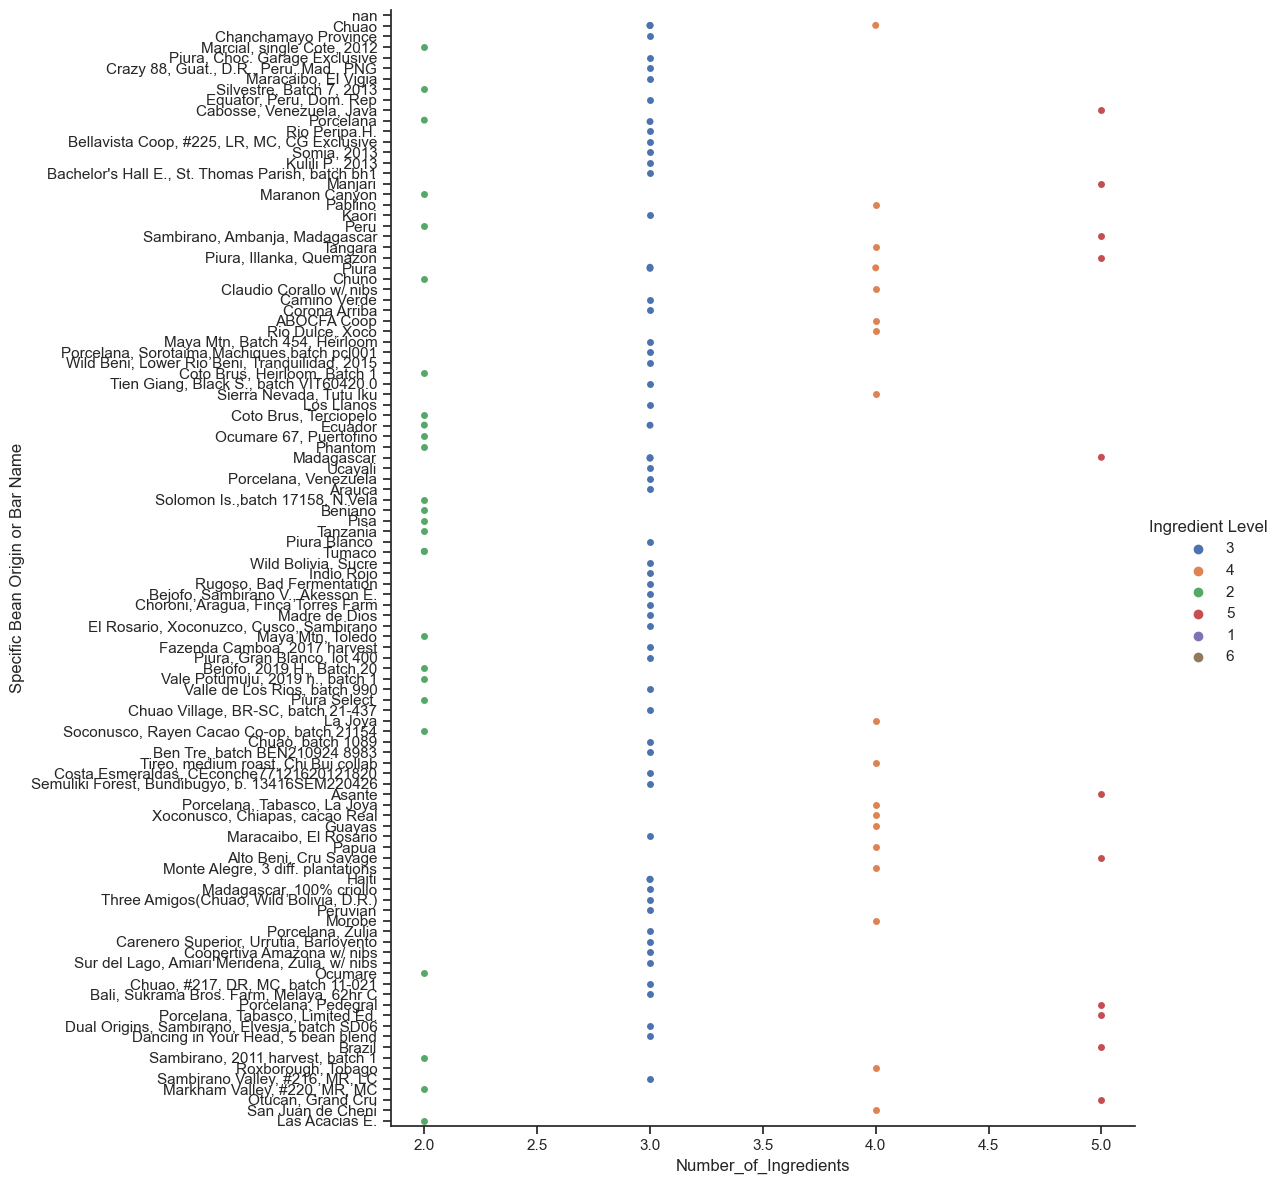

In [57]:
# Create a categorical plot in seaborn using the 'Ingredient Level' categories created above

sns.set(style="ticks")
g = sns.catplot(x='Number_of_Ingredients', y=highest_rating_companies['Specific Bean Origin or Bar Name'], hue='Ingredient Level', data=df_flavors_clean, height=12, aspect=1)


### And most beans, regardless of original origin, are used in bars with 3 ingredients.

# 6. Hypothesis

### Chocolate bars with the highest rating have a mid-level amount of cocoa.
### Most chocolate bars with the highest rating have the three ingredients.
### Cocao beans used in the highest rated chocolate bars come from no one specific or particular place. 

# 7. Exporting Data

In [58]:
# checking final shape of df_flavors_clean before export as df_flavors_clean_2
df_flavors_clean.shape

(2657, 13)

In [59]:
# exporting
df_flavors_clean.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_flavors_clean_2.xlsx'))
